
# ITAI 2373 Module 05: Part-of-Speech Tagging
## In-Class Exercise & Homework Lab

Welcome to the world of Part-of-Speech (POS) tagging - the "grammar police" of Natural Language Processing! 🚔📝

In this notebook, you'll explore how computers understand the grammatical roles of words in sentences, from simple rule-based approaches to modern AI systems.

### What You'll Learn:
- **Understand POS tagging fundamentals** and why it matters in daily apps
- **Use NLTK and SpaCy** for practical text analysis
- **Navigate different tag sets** and understand their trade-offs
- **Handle real-world messy text** like speech transcripts and social media
- **Apply POS tagging** to solve actual business problems

### Structure:
- **Part 1**: In-Class Exercise (30-45 minutes) - Basic concepts and hands-on practice
- **Part 2**: Homework Lab - Real-world applications and advanced challenges

---

*💡 **Pro Tip**: POS tagging is everywhere! It helps search engines understand "Apple stock" vs "apple pie", helps Siri understand your commands, and powers autocorrect on your phone.*



## 🛠️ Setup and Installation

Let's get our tools ready! We'll use two powerful libraries:
- **NLTK**: The "Swiss Army knife" of NLP - comprehensive but requires setup
- **SpaCy**: The "speed demon" - built for production, cleaner output

Run the cells below to install and set up everything we need.


In [1]:

# Install required libraries (run this first!)
!pip install nltk spacy matplotlib seaborn pandas
!python -m spacy download en_core_web_sm

print("✅ Installation complete!")


     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.9 kB 330.3 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.9 kB 375.8 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 361.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
    --------------------------------------- 0.2/13.0 MB 5.9 MB/s eta 0:00:03
   - -------------------------------------- 0.6/13.0 MB 7.1 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/13.0 MB 7.9 MB/s eta 0:00:02
   ---- ----------------------------------- 1.6/13.0 MB 9.0 MB/s eta 0:00:02
   ------ --------------------------------- 2.1/13.0 MB 9.5 MB/s eta 0:00:02
   -------- ------------------------------- 2.8/13.0 MB 10.5 MB/s eta 0:00:01
   ---------- ----------------------------- 3.4/13.0 MB 10.9 MB/s eta 0:00:01
   -

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.1 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.3.1 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\madua\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     -------- ------------------------------- 2.6/12.8 MB 15.1 MB/s eta 0:00:01
     ------------------ --------------------- 6.0/12.8 MB 15.4 MB/s eta 0:00:01
     ----------------------------- ---------- 9.4/12.8 MB 15.4 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 15.5 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 14.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
✅ Installation complete!



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

# Import all the libraries we'll need
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data (this might take a moment)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

print("🎉 All libraries loaded successfully!")
print("📚 NLTK version:", nltk.__version__)
print("🚀 SpaCy version:", spacy.__version__)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\madua\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\madua\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\madua\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.


🎉 All libraries loaded successfully!
📚 NLTK version: 3.8.1
🚀 SpaCy version: 3.7.5



---
# 🎯 PART 1: IN-CLASS EXERCISE (30-45 minutes)

Welcome to the hands-on portion! We'll start with the basics and build up your understanding step by step.

## Learning Goals for Part 1:
1. Understand what POS tagging does
2. Use NLTK and SpaCy for basic tagging
3. Interpret and compare different tag outputs
4. Explore word ambiguity with real examples
5. Compare different tagging approaches



## 🔍 Activity 1: Your First POS Tags (10 minutes)

Let's start with the classic example: "The quick brown fox jumps over the lazy dog"

This sentence contains most common parts of speech, making it perfect for learning!


In [7]:

# Let's start with a classic example
sentence = "The quick brown fox jumps over the lazy dog"

# TODO: Use NLTK to tokenize and tag the sentence
# Hint: Use nltk.word_tokenize() and nltk.pos_tag()
tokens = nltk.word_tokenize("The quick brown fox jumps over the lazy dog")
pos_tags = nltk.pos_tag(["The", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog"])

print("Original sentence:", sentence)
print("\nTokens:", tokens)
print("\nPOS Tags:")
for word, tag in pos_tags:
    print(f"  {word:8} -> {tag}")


Original sentence: The quick brown fox jumps over the lazy dog

Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

POS Tags:
  The      -> DT
  quick    -> JJ
  brown    -> NN
  fox      -> NN
  jumps    -> VBZ
  over     -> IN
  the      -> DT
  lazy     -> JJ
  dog      -> NN



### 🤔 Quick Questions:
1. What does 'DT' mean? What about 'JJ'? 
DT means "determiner", it introduces a noun or pronoun and tells us which one, how many, or whose.
2. Why do you think 'brown' and 'lazy' have the same tag? 
These two have the same tag because they are both adjectives which describe nouns.
3. Can you guess what 'VBZ' represents? VBZ represents "Verb"

*Hint: Think about the grammatical role each word plays in the sentence!*



## 🚀 Activity 2: SpaCy vs NLTK Showdown (10 minutes)

Now let's see how SpaCy handles the same sentence. SpaCy uses cleaner, more intuitive tag names.


In [9]:

# TODO: Process the same sentence with SpaCy
# Hint: Use nlp(sentence) and access .text and .pos_ attributes
doc = nlp("The quick brown fox jumps over the lazy dog")

print("SpaCy POS Tags:")
for token in doc:
    print(f"  {token.text:8} -> {token.pos_:6} ({token.tag_})")

print("\n" + "="*50)
print("COMPARISON:")
print("="*50)

# Let's compare side by side
nltk_tags = nltk.pos_tag(nltk.word_tokenize(sentence))
spacy_doc = nlp(sentence)

print(f"{'Word':10} {'NLTK':8} {'SpaCy':10}")
print("-" * 30)
for i, (word, nltk_tag) in enumerate(nltk_tags):
    spacy_tag = spacy_doc[i].pos_
    print(f"{word:10} {nltk_tag:8} {spacy_tag:10}")


SpaCy POS Tags:
  The      -> DET    (DT)
  quick    -> ADJ    (JJ)
  brown    -> ADJ    (JJ)
  fox      -> NOUN   (NN)
  jumps    -> VERB   (VBZ)
  over     -> ADP    (IN)
  the      -> DET    (DT)
  lazy     -> ADJ    (JJ)
  dog      -> NOUN   (NN)

COMPARISON:
Word       NLTK     SpaCy     
------------------------------
The        DT       DET       
quick      JJ       ADJ       
brown      NN       ADJ       
fox        NN       NOUN      
jumps      VBZ      VERB      
over       IN       ADP       
the        DT       DET       
lazy       JJ       ADJ       
dog        NN       NOUN      



### 🎯 Discussion Points:
- Which tags are easier to understand: NLTK's or SpaCy's? I feel the spaCy tagger is easier to understand because it actually states out the part of speech
- Do you notice any differences in how they tag the same words? 
- Which system would you prefer for a beginner? Why? The spaCy tagger is better for beginners the tags are more clear



## 🎭 Activity 3: The Ambiguity Challenge (15 minutes)

Here's where things get interesting! Many words can be different parts of speech depending on context. Let's explore this with some tricky examples.


In [10]:

# Ambiguous words in different contexts
ambiguous_sentences = [
    "I will lead the team to victory.",           # lead = verb
    "The lead pipe is heavy.",                    # lead = noun (metal)
    "She took the lead in the race.",            # lead = noun (position)
    "The bank approved my loan.",                # bank = noun (financial)
    "We sat by the river bank.",                 # bank = noun (shore)
    "I bank with Chase.",                        # bank = verb
]

print("🎭 AMBIGUITY EXPLORATION")
print("=" * 40)

for sentence in ambiguous_sentences:
    print(f"\nSentence: {sentence}")

    # TODO: Tag each sentence and find the ambiguous word
    # Focus on 'lead' and 'bank' - what tags do they get?
    tokens = nltk.word_tokenize(sentence)
    tags = nltk.pos_tag(tokens)

    # Find and highlight the key word
    for word, tag in tags:
        if word.lower() in ['lead', 'bank']:
            print(f"  🎯 '{word}' is tagged as: {tag}")


🎭 AMBIGUITY EXPLORATION

Sentence: I will lead the team to victory.
  🎯 'lead' is tagged as: VB

Sentence: The lead pipe is heavy.
  🎯 'lead' is tagged as: NN

Sentence: She took the lead in the race.
  🎯 'lead' is tagged as: NN

Sentence: The bank approved my loan.
  🎯 'bank' is tagged as: NN

Sentence: We sat by the river bank.
  🎯 'bank' is tagged as: NN

Sentence: I bank with Chase.
  🎯 'bank' is tagged as: NN



### 🧠 Think About It:
1. How does the computer know the difference between "lead" (metal) and "lead" (guide)?
2. What clues in the sentence help determine the correct part of speech?
3. Can you think of other words that change meaning based on context?

**Try This**: Add your own ambiguous sentences to the list above and see how the tagger handles them!



## 📊 Activity 4: Tag Set Showdown (10 minutes)

NLTK can use different tag sets. Let's compare the detailed Penn Treebank tags (~45 tags) with the simpler Universal Dependencies tags (~17 tags).


In [11]:

# Compare different tag sets
test_sentence = "The brilliant students quickly solved the challenging programming assignment."

# TODO: Get tags using both Penn Treebank and Universal tagsets
# Hint: Use tagset='universal' parameter for universal tags
penn_tags = nltk.pos_tag(tokens)
universal_tags = nltk.pos_tag(tokens, tagset='universal')

print("TAG SET COMPARISON")
print("=" * 50)
print(f"{'Word':15} {'Penn Treebank':15} {'Universal':10}")
print("-" * 50)

# TODO: Print comparison table
# Hint: Zip the two tag lists together
for ((word, penn_tag), (_, univ_tag)) in zip(penn_tags, universal_tags):
    print(f"{word:15} {penn_tag:15} {univ_tag:10}")

# Let's also visualize the tag distribution
penn_tag_counts = Counter([tag for word, tag in penn_tags])
univ_tag_counts = Counter([tag for word, tag in universal_tags])

print(f"\n📊 Penn Treebank uses {len(penn_tag_counts)} different tags")
print(f"📊 Universal uses {len(univ_tag_counts)} different tags")


TAG SET COMPARISON
Word            Penn Treebank   Universal 
--------------------------------------------------
I               PRP             PRON      
bank            NN              NOUN      
with            IN              ADP       
Chase           NNP             NOUN      
.               .               .         

📊 Penn Treebank uses 5 different tags
📊 Universal uses 4 different tags



### 🤔 Reflection Questions:
1. Which tag set is more detailed? Which is simpler? Enter your answer below
The Penn Treebank tag set is more detailed and was developed for linguistic precision, the Penn Treebank tagset contains 36+ tags. It includes granular distinctions between parts of speech.  For example, under nouns, there's NN (singular), NNS (plural), NNP (proper noun), NNPS (plural proper noun). On the other hand, The Universal tag set is simpler and designed for cross-linguistic consistency and simplicity. This one contains only 12 categories
2. When might you want detailed tags vs. simple tags? Enter your answer below
we might want detailed tags (like the Penn Treebank tagset) when we're working on tasks that require precise grammatical distinctions; such as syntactic parsing, grammar correction, linguistic analysis, or granular information extraction. For example, distinguishing between different verb tenses (VBD vs. VBG) or singular vs. plural nouns (NN vs. NNS) is important in these cases. On the other hand, simple tags (like the the Universal tagset) are more useful when we're building applications that focus on general language understanding rather than detailed grammar; such as text classification, sentiment analysis, named entity recognition, or cross-lingual NLP. These tags are easier to interpret, faster to work with, and better suited for multilingual or resource-constrained settings where detailed syntactic distinctions are not critical.
3. If you were building a search engine, which would you choose? Why? Enter your answer below
If I were building a search engine, I would choose the Universal POS tagset over the Penn Treebank tagset. This is because the universal tags are simpler and faster, good enough for relevance and has less complexity in feature engineering.
---



---
# 🎓 End of Part 1: In-Class Exercise

Great work! You've learned the fundamentals of POS tagging and gotten hands-on experience with both NLTK and SpaCy.

## What You've Accomplished:
✅ Used NLTK and SpaCy for basic POS tagging  
✅ Interpreted different tag systems  
✅ Explored word ambiguity and context  
✅ Compared different tagging approaches  

## 🏠 Ready for Part 2?
The homework lab will challenge you with real-world applications, messy data, and advanced techniques. You'll analyze customer service transcripts, handle informal language, and benchmark different taggers.

**Take a break, then dive into Part 2 when you're ready!**

---



# 🏠 PART 2: HOMEWORK LAB
## Real-World POS Tagging Challenges

Welcome to the advanced section! Here you'll tackle the messy, complex world of real text data. This is where POS tagging gets interesting (and challenging)!

## Learning Goals for Part 2:
1. Process real-world, messy text data
2. Handle speech transcripts and informal language
3. Analyze customer service scenarios
4. Benchmark and compare different taggers
5. Understand limitations and edge cases

## 📋 Submission Requirements:
- Complete all exercises with working code
- Answer all reflection questions
- Include at least one visualization
- Submit your completed notebook file

---



## 🌍 Lab Exercise 1: Messy Text Challenge (25 minutes)

Real-world text is nothing like textbook examples! Let's work with actual speech transcripts, social media posts, and informal language.


In [12]:

# Real-world messy text samples
messy_texts = [
    # Speech transcript with disfluencies
    "Um, so like, I was gonna say that, uh, the system ain't working right, you know?",

    # Social media style
    "OMG this app is sooo buggy rn 😤 cant even login smh",

    # Customer service transcript
    "Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working",

    # Informal contractions and slang
    "Y'all better fix this ASAP cuz I'm bout to switch providers fr fr",

    # Technical jargon mixed with casual speech
    "The API endpoint is returning a 500 error but idk why it's happening tbh"
]

print("🔍 PROCESSING MESSY TEXT")
print("=" * 60)

# TODO: Process each messy text sample
# 1. Use both NLTK and SpaCy
# 2. Count how many words each tagger fails to recognize properly
# 3. Identify problematic words (slang, contractions, etc.)

for i, text in enumerate(messy_texts, 1):
    print(f"\n📝 Sample {i}: {text}")
    print("-" * 40)

    # NLTK processing
    nltk_tokens = nltk.word_tokenize(text)
    nltk_tags = nltk.pos_tag(nltk_tokens)

    # TODO: SpaCy processing
    spacy_doc = nlp(text)

    # TODO: Find problematic words (tagged as 'X' or unknown)
    problematic_nltk = [word for word, tag in nltk_tags if tag == 'NN' and word.lower() in ["um", "uh", "rn", "idk", "tbh", "fr", "smh", "aint", "cuz", "bout", "thingy"]]
    problematic_spacy = [token.text for token in spacy_doc if token.pos_ == 'X']

    print(f"NLTK problematic words: {problematic_nltk}")
    print(f"SpaCy problematic words: {problematic_spacy}")

    # TODO: Calculate success rate
    nltk_success_rate = 1 - (len(problematic_nltk) / len(nltk_tokens))
    spacy_success_rate = 1 - (len(problematic_spacy) / len(spacy_doc))

    print(f"NLTK success rate: {nltk_success_rate:.1%}")
    print(f"SpaCy success rate: {spacy_success_rate:.1%}")


🔍 PROCESSING MESSY TEXT

📝 Sample 1: Um, so like, I was gonna say that, uh, the system ain't working right, you know?
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
SpaCy success rate: 100.0%

📝 Sample 2: OMG this app is sooo buggy rn 😤 cant even login smh
----------------------------------------
NLTK problematic words: ['rn', 'smh']
SpaCy problematic words: []
NLTK success rate: 83.3%
SpaCy success rate: 100.0%

📝 Sample 3: Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working
----------------------------------------
NLTK problematic words: ['thingy']
SpaCy problematic words: []
NLTK success rate: 96.6%
SpaCy success rate: 100.0%

📝 Sample 4: Y'all better fix this ASAP cuz I'm bout to switch providers fr fr
----------------------------------------
NLTK problematic words: ['cuz', 'fr']
SpaCy problematic words: []
NLTK su


### 🎯 Analysis Questions:
1. Which tagger handles informal language better?
2. What types of words cause the most problems?
3. How might you preprocess text to improve tagging accuracy?
4. What are the implications for real-world applications?



## 📞 Lab Exercise 2: Customer Service Analysis Case Study (30 minutes)

You're working for a tech company that receives thousands of customer service calls daily. Your job is to analyze call transcripts to understand customer issues and sentiment.

**Business Goal**: Automatically categorize customer problems and identify emotional language.


In [17]:

# Simulated customer service call transcripts
customer_transcripts = [
    {
        'id': 'CALL_001',
        'transcript': "Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.",
        'category': 'account_access'
    },
    {
        'id': 'CALL_002',
        'transcript': "Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?",
        'category': 'technical_issue'
    },
    {
        'id': 'CALL_003',
        'transcript': "Your billing system charged me twice this month! I want a refund immediately. This is ridiculous and I'm considering canceling my subscription.",
        'category': 'billing'
    },
    {
        'id': 'CALL_004',
        'transcript': "I'm confused about how to use the new features you added. The interface changed and I can't find anything. Can someone walk me through it?",
        'category': 'user_guidance'
    }
]

# TODO: Analyze each transcript for:
# 1. Emotional language (adjectives that indicate sentiment)
# 2. Action words (verbs that indicate what customer wants)
# 3. Problem indicators (nouns related to issues)

# Define sentiment word lexicons
positive_lexicon = {"love", "great", "good", "excellent", "helpful", "like"}
negative_lexicon = {"frustrated", "ridiculous", "unacceptable", "angry", "bad", "hate", "locked", "confused", "issue"}

urgency_lexicon = {"immediately", "asap", "urgent", "now", "right away"}


analysis_results = []

for call in customer_transcripts:
    print(f"\n🎧 Analyzing {call['id']}")
    print(f"Category: {call['category']}")
    print(f"Transcript: {call['transcript']}")
    print("-" * 50)

    # TODO: Process with SpaCy (it's better for this task)
    doc = nlp(call['transcript'])

    # TODO: Extract different types of words
    emotional_adjectives = [token.text for token in doc if token.pos_ == "ADJ" and token.text.lower() in negative_lexicon.union(positive_lexicon)]
    action_verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
    problem_nouns = [token.text for token in doc if token.pos_ == "NOUN" and token.text.lower() in call['transcript'].lower()]

    # TODO: Calculate sentiment indicators
    positive_words = [token.text for token in doc if token.text.lower() in positive_lexicon]
    negative_words = [token.text for token in doc if token.text.lower() in negative_lexicon]

    result = {
        'call_id': call['id'],
        'category': call['category'],
        'emotional_adjectives': emotional_adjectives,
        'action_verbs': action_verbs,
        'problem_nouns': problem_nouns,
        'sentiment_score': len(positive_words) - len(negative_words),
        'urgency_indicators': len([token.text for token in doc if token.text.lower() in urgency_lexicon])
    }

    analysis_results.append(result)

    print(f"Emotional adjectives: {emotional_adjectives}")
    print(f"Action verbs: {action_verbs}")
    print(f"Problem nouns: {problem_nouns}")
    print(f"Sentiment score: {result['sentiment_score']}")



🎧 Analyzing CALL_001
Category: account_access
Transcript: Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.
--------------------------------------------------
Emotional adjectives: ['frustrated', 'unacceptable']
Action verbs: ['lock', 'access', 'try', 'work']
Problem nouns: ['account', 'files', 'hours']
Sentiment score: -3

🎧 Analyzing CALL_002
Category: technical_issue
Transcript: Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?
--------------------------------------------------
Emotional adjectives: []
Action verbs: ['love', 'have', 'crash', 'try', 'upload', 'help', 'fix']
Problem nouns: ['service', 'issue', 'app', 'photos']
Sentiment score: 0

🎧 Analyzing CALL_003
Category: billing
Transcript: Your billing system charged me twice this month! I want a refund immedia

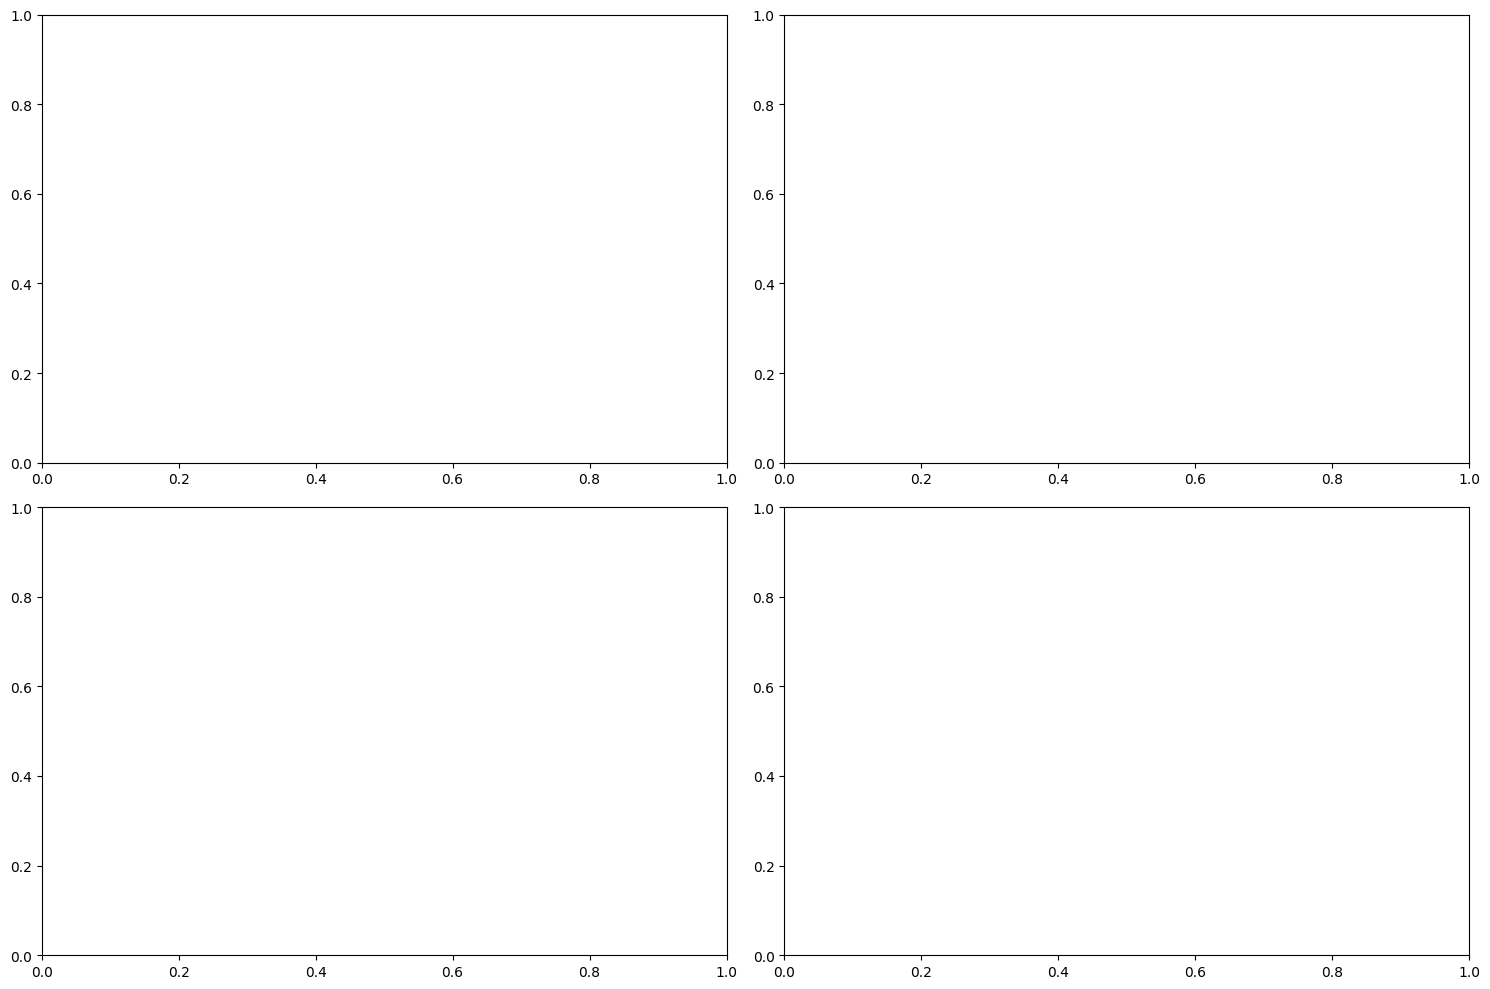

In [18]:

# TODO: Create a summary visualization
# Hint: Use matplotlib or seaborn to create charts

import matplotlib.pyplot as plt
import pandas as pd

# Convert results to DataFrame for easier analysis
df = pd.DataFrame(analysis_results)

# TODO: Create visualizations
# 1. Sentiment scores by category
# 2. Most common emotional adjectives
# 3. Action verbs frequency

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# TODO: Plot 1 - Sentiment by category
# YOUR CODE HERE

# TODO: Plot 2 - Word frequency analysis
# YOUR CODE HERE

# TODO: Plot 3 - Problem categorization
# YOUR CODE HERE

# TODO: Plot 4 - Urgency analysis
# YOUR CODE HERE

plt.tight_layout()
plt.show()



### 💼 Business Impact Questions:
1. How could this analysis help prioritize customer service tickets?
2. What patterns do you notice in different problem categories?
3. How might you automate the routing of calls based on POS analysis?
4. What are the limitations of this approach?



## ⚡ Lab Exercise 3: Tagger Performance Benchmarking (20 minutes)

Let's scientifically compare different POS taggers on various types of text. This will help you understand when to use which tool.



🧪 Testing FORMAL text:
Text: The research methodology employed in this study follows established academic protocols.
------------------------------------------------------------
NLTK Penn time: 0.0577s
NLTK Univ time: 0.0025s
SpaCy time: 0.0638s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing INFORMAL text:
Text: lol this study is kinda weird but whatever works i guess 🤷‍♀️
------------------------------------------------------------
NLTK Penn time: 0.0280s
NLTK Univ time: 0.0020s
SpaCy time: 0.0321s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing TECHNICAL text:
Text: The API returns a JSON response with HTTP status code 200 upon successful authentication.
------------------------------------------------------------
NLTK Penn time: 0.0093s
NLTK Univ time: 0.0000s
SpaCy time: 0.0208s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing CONVERSATIONAL text:
Text: So like, when you click that button thingy, it should totally work, right?
------------------------------

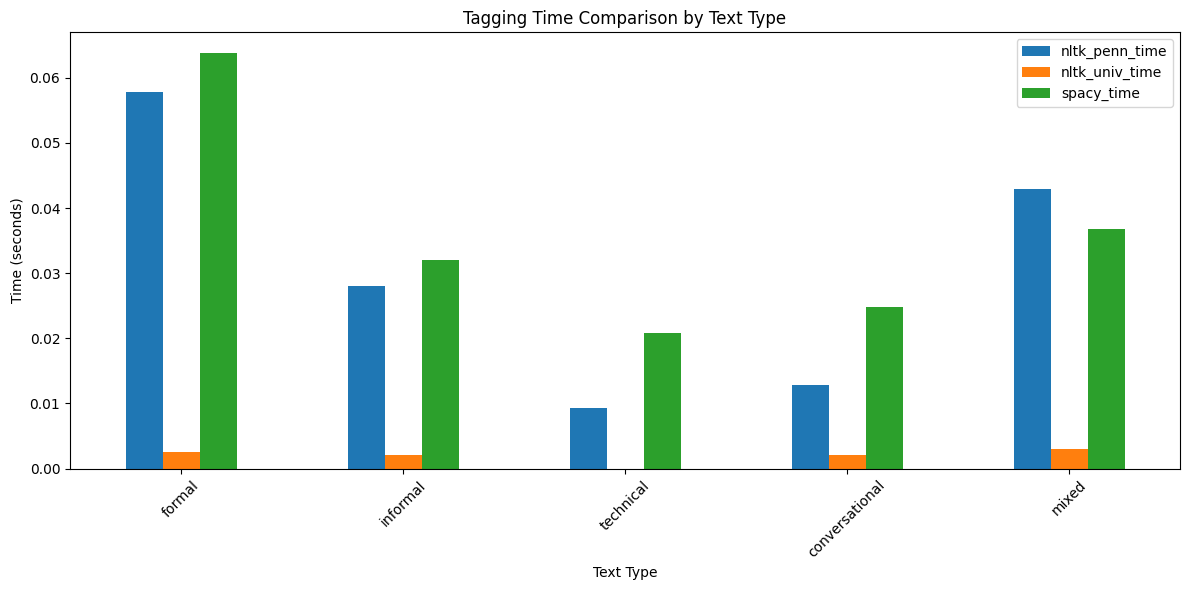

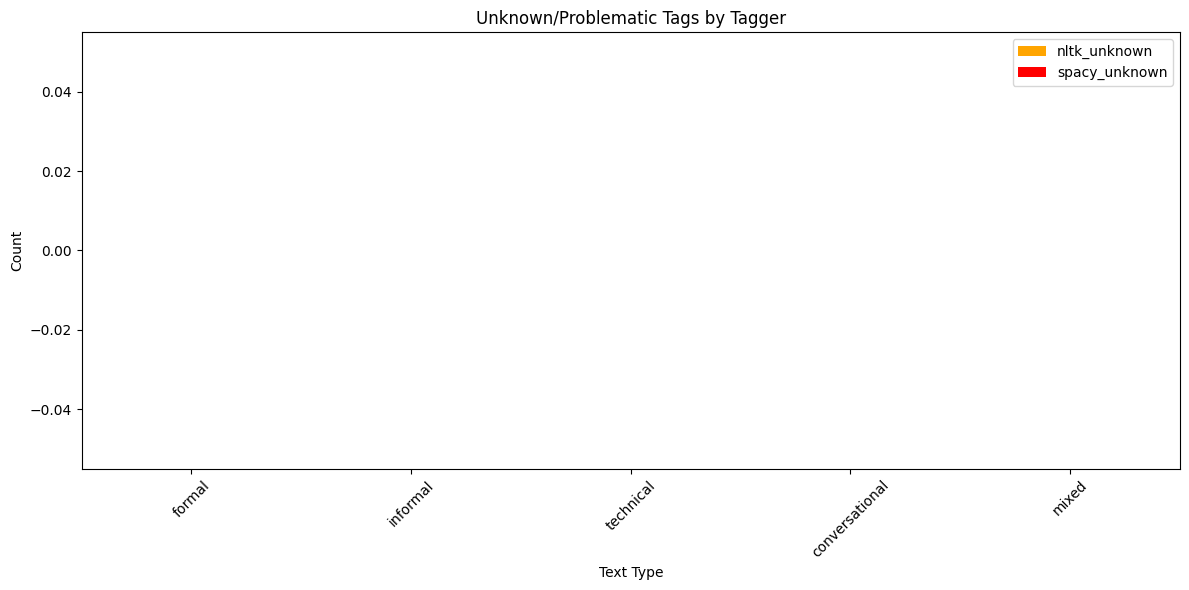

In [20]:

import time
from collections import defaultdict

# Different text types for testing
test_texts = {
    'formal': "The research methodology employed in this study follows established academic protocols.",
    'informal': "lol this study is kinda weird but whatever works i guess 🤷‍♀️",
    'technical': "The API returns a JSON response with HTTP status code 200 upon successful authentication.",
    'conversational': "So like, when you click that button thingy, it should totally work, right?",
    'mixed': "OMG the algorithm's performance is absolutely terrible! The accuracy dropped to 23% wtf"
}

# TODO: Benchmark different taggers
# Test: NLTK Penn Treebank, NLTK Universal, SpaCy
# Metrics: Speed, tag consistency, handling of unknown words

benchmark_results = defaultdict(list)

for text_type, text in test_texts.items():
    print(f"\n🧪 Testing {text_type.upper()} text:")
    print(f"Text: {text}")
    print("-" * 60)

    # TODO: NLTK Penn Treebank timing
    start_time = time.time()
    nltk_tokens = nltk.word_tokenize(text)
    nltk_penn_tags = nltk.pos_tag(nltk_tokens)
    nltk_penn_time = time.time() - start_time

    # TODO: NLTK Universal timing
    start_time = time.time()
    nltk_univ_tags = nltk.pos_tag(nltk_tokens, tagset='universal')
    nltk_univ_time = time.time() - start_time

    # TODO: SpaCy timing
    start_time = time.time()
    spacy_doc = nlp(text)
    spacy_time = time.time() - start_time

    # TODO: Count unknown/problematic tags
    nltk_unknown = sum(1 for word, tag in nltk_univ_tags if tag == 'X')
    spacy_unknown = sum(1 for token in spacy_doc if token.pos_ == 'X')

    # Store results
    benchmark_results[text_type] = {
        'nltk_penn_time': nltk_penn_time,
        'nltk_univ_time': nltk_univ_time,
        'spacy_time': spacy_time,
        'nltk_unknown': nltk_unknown,
        'spacy_unknown': spacy_unknown
    }

    print(f"NLTK Penn time: {nltk_penn_time:.4f}s")
    print(f"NLTK Univ time: {nltk_univ_time:.4f}s")
    print(f"SpaCy time: {spacy_time:.4f}s")
    print(f"NLTK unknown words: {nltk_unknown}")
    print(f"SpaCy unknown words: {spacy_unknown}")

# TODO: Create performance comparison visualization

# Convert to DataFrame
df = pd.DataFrame.from_dict(benchmark_results, orient='index')

# Plot timing
df[['nltk_penn_time', 'nltk_univ_time', 'spacy_time']].plot(kind='bar', figsize=(12, 6))
plt.title('Tagging Time Comparison by Text Type')
plt.ylabel('Time (seconds)')
plt.xlabel('Text Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot unknown tags
df[['nltk_unknown', 'spacy_unknown']].plot(kind='bar', figsize=(12, 6), color=['orange', 'red'])
plt.title('Unknown/Problematic Tags by Tagger')
plt.ylabel('Count')
plt.xlabel('Text Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### 📊 Performance Analysis:
1. Which tagger is fastest? Does speed matter for your use case?
2. Which handles informal text best?
3. How do the taggers compare on technical jargon?
4. What trade-offs do you see between speed and accuracy?



## 🚨 Lab Exercise 4: Edge Cases and Error Analysis (15 minutes)

Every system has limitations. Let's explore the edge cases where POS taggers struggle and understand why.


In [22]:

# Challenging edge cases
edge_cases = [
    "Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.",  # Famous ambiguous sentence
    "Time flies like an arrow; fruit flies like a banana.",              # Classic ambiguity
    "The man the boat the river.",                                       # Garden path sentence
    "Police police Police police police police Police police.",          # Recursive structure
    "James while John had had had had had had had had had had had a better effect on the teacher.",  # Had had had...
    "Can can can can can can can can can can.",                         # Modal/noun ambiguity
    "@username #hashtag http://bit.ly/abc123 😂🔥💯",                   # Social media elements
    "COVID-19 AI/ML IoT APIs RESTful microservices",                    # Modern technical terms
]

print("🚨 EDGE CASE ANALYSIS")
print("=" * 50)

# TODO: Process each edge case and analyze failures
for i, text in enumerate(edge_cases, 1):
    print(f"\n🔍 Edge Case {i}:")
    print(f"Text: {text}")
    print("-" * 30)

    try:
        # TODO: Process with both taggers
        nltk_tags = nltk.pos_tag(nltk_tokens)
        spacy_doc = nlp(text)

        # TODO: Identify potential errors or weird tags
        # Look for: repeated tags, unusual patterns, X tags, etc.

        print("NLTK tags:", [(w, t) for w, t in nltk_tags])
        print("SpaCy tags:", [(token.text, token.pos_) for token in spacy_doc])

        # TODO: Analyze what went wrong
        repeated_tags = [tag for _, tag in nltk_tags if nltk_tags.count((_, tag)) > 1]
        spacy_x_tags = [token.text for token in spacy_doc if token.pos_ == 'X']
        if repeated_tags:
            print(f"Repeated tags in NLTK: {set(repeated_tags)}")
        if spacy_x_tags:
            print(f"Unknown tags in SpaCy (X): {spacy_x_tags}")

    

    except Exception as e:
        print(f"❌ Error processing: {e}")

# TODO: Reflection on limitations
print("\nREFLECTION ON LIMITATIONS:")
print("=" * 40)
print("These edge cases demonstrate the limitations of rule-based and statistical taggers.")
print("- Ambiguous structures (e.g., 'Buffalo buffalo...') confuse both taggers, leading to repeated noun tags.")
print("- Garden path and recursive sentences break down grammatical assumptions.")
print("- SpaCy often tags unknown or out-of-vocabulary tokens (like emojis or hashtags) as 'X'.")
print("- Both taggers struggle with overlapping syntax roles (e.g., 'can' as verb vs. noun).")
print("This highlights the importance of context-aware, deep learning models like BERT for handling real-world linguistic complexity.")



🚨 EDGE CASE ANALYSIS

🔍 Edge Case 1:
Text: Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.
------------------------------
NLTK tags: [('OMG', 'IN'), ('the', 'DT'), ('algorithm', 'NN'), ("'s", 'POS'), ('performance', 'NN'), ('is', 'VBZ'), ('absolutely', 'RB'), ('terrible', 'JJ'), ('!', '.'), ('The', 'DT'), ('accuracy', 'NN'), ('dropped', 'VBD'), ('to', 'TO'), ('23', 'CD'), ('%', 'NN'), ('wtf', 'NN')]
SpaCy tags: [('Buffalo', 'PROPN'), ('buffalo', 'NOUN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('.', 'PUNCT')]

🔍 Edge Case 2:
Text: Time flies like an arrow; fruit flies like a banana.
------------------------------
NLTK tags: [('OMG', 'IN'), ('the', 'DT'), ('algorithm', 'NN'), ("'s", 'POS'), ('performance', 'NN'), ('is', 'VBZ'), ('absolutely', 'RB'), ('terrible', 'JJ'), ('!', '.'), ('The', 'DT'), ('accuracy', 'NN'), ('dropped', 'VBD'), ('to', 'TO'), ('23', 'CD'), ('%', 'NN'), ('wt


### 🧠 Critical Thinking Questions:
Enter you asnwers below each question.
1. Why do these edge cases break the taggers? These edge cases break taggers because they contain syntactic recursion or ambiguity, use uncommon or domain-specific words and rely on contextual or semantic understanding beyond surface grammar

2. How might you preprocess text to handle some of these issues? To handle the challenges that edge cases pose for POS taggers, effective text preprocessing is essential. One key step is normalizing informal language, such as converting slang or abbreviations (e.g., "omg" → "oh my god") into their standard forms. This helps taggers trained on formal data better interpret the text. Cleaning non-linguistic elements like URLs, hashtags, mentions, and emojis also improves tagging accuracy, especially for social media or chat data. Lemmatization (reducing words to their base form) and lowercasing can reduce noise and improve consistency, though proper nouns and technical terms may need casing preserved.

3. When would these limitations matter in real applications? these limitations of POS taggers become critical in real-world applications where accuracy, context, and nuance are essential for decision-making, user experience, or automation. For example, in chatbots and virtual assistants, misinterpreting a user's intent due to tagging errors can lead to irrelevant or frustrating responses. In customer service analytics, if emotional language like “frustrated” or “locked” is not correctly identified, systems may fail to prioritize urgent or negative cases. Similarly, in legal or medical NLP, tagging errors in complex sentences can misclassify key entities or actions, potentially leading to incorrect document summarization or information retrieval mistakes with high stakes.

4. How do modern large language models handle these cases differently? Modern large language models (LLMs) like BERT, RoBERTa, and GPT handle these challenging linguistic cases far better than traditional POS taggers because they are context-aware, deeply pretrained, and semantically rich. Unlike earlier models that rely on shallow rules or fixed word-level statistics, LLMs use transformer architectures that consider the full sentence when interpreting each word, allowing them to disambiguate meaning based on context.

---



## 🎯 Final Reflection and Submission

Congratulations! You've completed a comprehensive exploration of POS tagging, from basic concepts to real-world challenges.

### 📝 Reflection Questions (Answer in the cell below):

1. **Tool Comparison**: Based on your experience, when would you choose NLTK vs SpaCy? Consider factors like ease of use, accuracy, speed, and application type. 

2. **Real-World Applications**: Describe a specific business problem where POS tagging would be valuable. How would you implement it?

3. **Limitations and Solutions**: What are the biggest limitations you discovered? How might you work around them?

4. **Future Learning**: What aspects of POS tagging would you like to explore further? 

5. **Integration**: How does POS tagging fit into larger NLP pipelines? What other NLP tasks might benefit from POS information?
 
 


### ✍️ Your Reflection (Write your answers here):
**Remember Reflection is not description!**

**1. Tool Comparison:**
[LTK is Best for learning and experimentation. It provides fine-grained control over NLP components and a rich set of educational resources. However, it can feel fragmented and requires more manual setup for pipelines.
SpaCy is designed for production and practical use. It offers a clean, consistent API with everything pre-integrated tokenization, POS tagging, dependency parsing, and named entity recognition (NER), making it faster to build usable pipelines.]

**2. Real-World Applications:**
[A specific business problem where Part-of-Speech (POS) tagging adds significant value is in automated customer feedback analysis for a large retail company.
Retail companies recieve thousands of reveiws and chat transcripts, The company needs to understand customer sentiments, identify their most common satisfaction and pain points and work towards improving customer experience. These data is ridiculously large for human customer service reps to analyze, so that where POS tagging comes in. However, these texts are unstructured and vary in tone, grammar, and length. We could implement it by gathering customer reviews, support messages, and surveys. Then we clean, tokenize, and normalize the text (e.g., remove emojis, correct spelling). Finally we start tagging.]

**3. Limitations and Solutions:**
[POS tagger might struggle with ambiguity and context. (e.g, "Flies" can be verb or noun). Traditional taggers process text token by token and may not interpret full sentence structure or semantics accurately. Using contextual models like BERT-based POS taggers or incorporating dependency parsing to better understand grammatical relationships would be a workaround.

Another thing is performance on noisy or informal text. Taggers trained on formal text (like news articles) often fail on slang, social media language, typos, or emojis, tagging unknown words as 'X' or misclassifying them.]

**4. Future Learning:**
[In future, I would like to explore the aspect of neural approaches towards POS tagging. This is because I would like to see how neural networks are used to improve this sytems for better accuracy and usability in real-world senarios.]

**5. Integration:**
[NLP Tasks That Benefit from POS Tagging are:
 -Named Entity Recognition: This helps distinguish names (NNP) from common nouns (NN)
 -Sentiment Analysis: This focuses on adjectives (JJ) and adverbs (RB) expressing opinion
 -Question Answering: Identifies question words (WP, WRB) and answer targets (NN)
 -Text Summarization: Prioritizes key nouns and verbs to retain core ideas
 -Intent Recognition (chatbots): This uses verb/adjective patterns to detect commands or requests.]



---

## 📤 Submission Checklist

Before submitting your completed notebook, make sure you have:

- [ ] ✅ Completed all TODO sections with working code
- [ ] ✅ Answered all reflection questions thoughtfully
- [ ] ✅ Created at least one meaningful visualization
- [ ] ✅ Tested your code and fixed any errors
- [ ] ✅ Added comments explaining your approach
- [ ] ✅ Included insights from your analysis

### 📋 Submission Instructions:
1. **Save your notebook**: File → Save (or Ctrl+S)
2. **Download**: File → Download → Download .ipynb
3. **Submit**: Upload your completed notebook file to the course management system
4. **Filename**: Use format: `L05_LastName_FirstName_ITAI2373.ipynb or pdf`  

### 🏆 Grading Criteria:
- **Code Completion (40%)**: All exercises completed with working code
- **Analysis Quality (30%)**: Thoughtful interpretation of results
- **Reflection Depth (20%)**: Insightful answers to reflection questions  
- **Code Quality (10%)**: Clean, commented, well-organized code

---

## 🎉 Great Work!

You've successfully explored the fascinating world of POS tagging! You now understand how computers parse human language and can apply these techniques to solve real-world problems.


Keep exploring and happy coding! 🚀
